In [15]:
# 📦 Librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt

# 📂 Cargar el dataset
url = 'https://raw.githubusercontent.com/sntamaria/TFM/main/dataset_v3.xlsx'
df = pd.read_excel(url)

# 🕒 Asegurarse de que 'fecha_corte' sea datetime
df['fecha_corte'] = pd.to_datetime(df['fecha_corte'])



In [16]:
# Filas y columnas
df.shape
# Tipos de datos y valores nulos
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   fecha_corte                    200 non-null    datetime64[ns]
 1   año                            200 non-null    int64         
 2   personas                       200 non-null    int64         
 3   embarcaciones                  200 non-null    int64         
 4   acumulado_personas             200 non-null    int64         
 5   acumulado_embarcaciones        200 non-null    int64         
 6   diff_interanual_personas       176 non-null    float64       
 7   diff_interanual_embarcaciones  176 non-null    float64       
 8   mes                            200 non-null    int64         
 9   quincena                       200 non-null    int64         
 10  mes_quincena                   200 non-null    object        
 11  dia_del_ano        

In [14]:
# Resumen también para columnas categóricas
df.describe(include='all')


,fecha_corte,año,personas,embarcaciones,acumulado_personas,acumulado_embarcaciones,diff_interanual_personas,diff_interanual_embarcaciones,mes,quincena,mes_quincena,dia_del_ano,estacion
count,200,200.000000,200.000000,200.000000,200.000000,200.000000,176.000000,176.000000,200.000000,200.000000,200,200.000000,200
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200,NaN,4
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01_Q1,NaN,Invierno
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,52
mean,2021-03-08 07:12:00,2020.680000,813.655000,16.615000,7627.245000,157.130000,2925.954545,43.000000,6.340000,1.500000,NaN,184.540000,NaN
min,2017-01-15 00:00:00,2017.000000,0.000000,-1.000000,0.000000,0.000000,-6634.000000,-203.000000,1.000000,1.000000,NaN,15.000000,NaN
25%,2019-02-11 06:00:00,2019.000000,38.250000,2.000000,454.000000,20.000000,8.000000,0.000000,3.000000,1.000000,NaN,90.000000,NaN
50%,2021-03-07 12:00:00,2021.000000,312.500000,8.000000,3208.500000,93.500000,1107.000000,28.500000,6.000000,1.500000,NaN,181.000000,NaN
75%,2023-04-03 18:00:00,2023.000000,1074.500000,23.000000,11416.500000,226.000000,4260.250000,78.500000,9.000000,2.000000,NaN,273.250000,NaN
max,2025-04-30 00:00:00,2025.000000,8561.000000,142.000000,46843.000000,745.000000,24228.000000,616.000000,12.000000,2.000000,NaN,366.000000,NaN


In [17]:
# Nombres de las columnas
df.columns


Index(['fecha_corte', 'año', 'personas', 'embarcaciones', 'acumulado_personas',
       'acumulado_embarcaciones', 'diff_interanual_personas',
       'diff_interanual_embarcaciones', 'mes', 'quincena', 'mes_quincena',
       'dia_del_ano', 'estacion'],
      dtype='object')

In [18]:
# Valores únicos por columna (puedes ajustar según tus columnas)
for col in df.columns:
    print(f"{col}: {df[col].nunique()} valores únicos")


fecha_corte: 200 valores únicos
año: 9 valores únicos
personas: 166 valores únicos
embarcaciones: 57 valores únicos
acumulado_personas: 181 valores únicos
acumulado_embarcaciones: 140 valores únicos
diff_interanual_personas: 170 valores únicos
diff_interanual_embarcaciones: 127 valores únicos
mes: 12 valores únicos
quincena: 2 valores únicos
mes_quincena: 200 valores únicos
dia_del_ano: 44 valores únicos
estacion: 4 valores únicos


### Llegadas de personas por mes (comparativa anual)

<Figure size 1200x600 with 0 Axes>

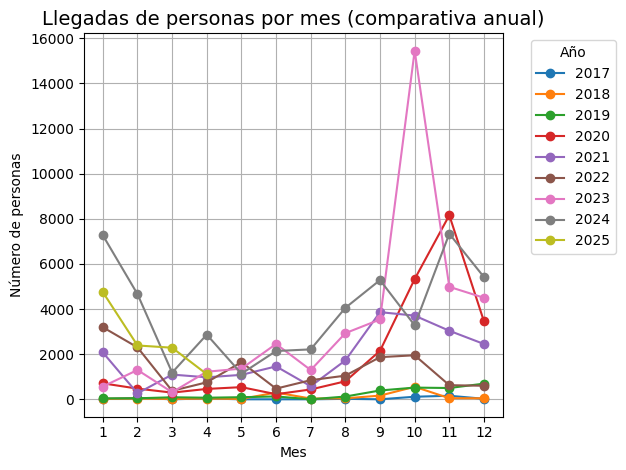

In [3]:
# 📈 Agrupar por año y mes, y sumar personas
personas_por_mes = df.groupby(['año', 'mes'])['personas'].sum().unstack(level=0)

# 🎨 Gráfico de líneas
plt.figure(figsize=(12, 6))
personas_por_mes.plot(marker='o')
plt.title('Llegadas de personas por mes (comparativa anual)', fontsize=14)
plt.xlabel('Mes')
plt.ylabel('Número de personas')
plt.xticks(range(1, 13))
plt.grid(True)
plt.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

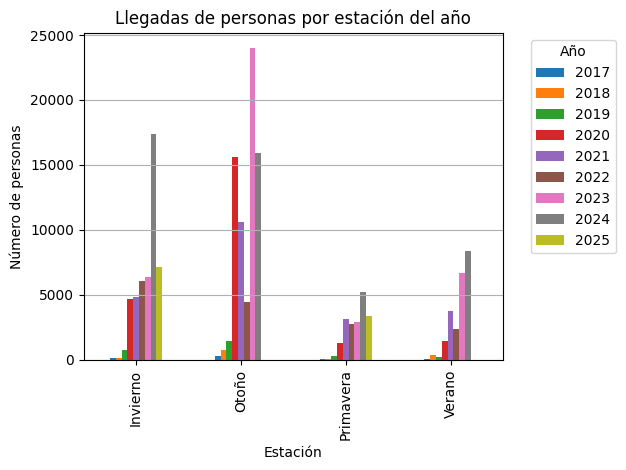

In [4]:
personas_por_estacion = df.groupby(['año', 'estacion'])['personas'].sum().unstack(level=0)

plt.figure(figsize=(10, 6))
personas_por_estacion.plot(kind='bar')
plt.title('Llegadas de personas por estación del año')
plt.xlabel('Estación')
plt.ylabel('Número de personas')
plt.grid(True, axis='y')
plt.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


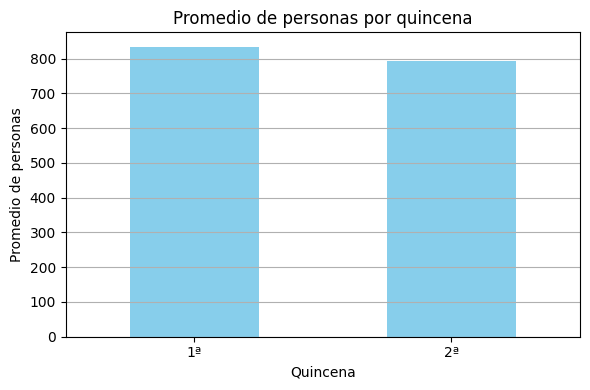

In [5]:
promedio_quincenal = df.groupby(['quincena'])['personas'].mean()

plt.figure(figsize=(6, 4))
promedio_quincenal.plot(kind='bar', color='skyblue')
plt.title('Promedio de personas por quincena')
plt.xlabel('Quincena')
plt.ylabel('Promedio de personas')
plt.xticks([0, 1], ['1ª', '2ª'], rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


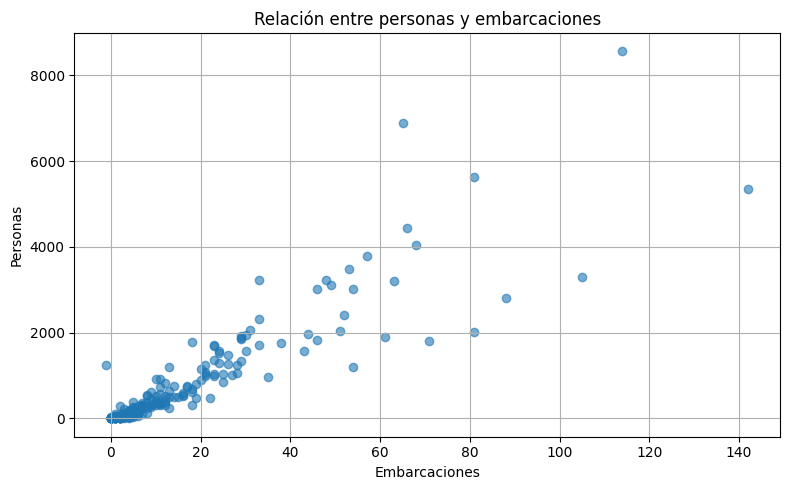

In [6]:
plt.figure(figsize=(8, 5))
plt.scatter(df['embarcaciones'], df['personas'], alpha=0.6)
plt.title('Relación entre personas y embarcaciones')
plt.xlabel('Embarcaciones')
plt.ylabel('Personas')
plt.grid(True)
plt.tight_layout()
plt.show()


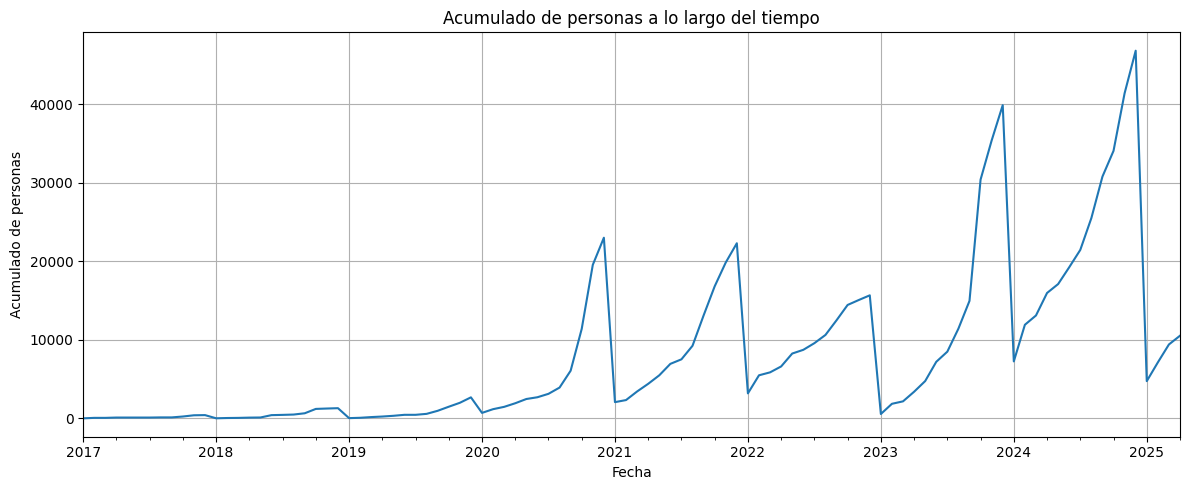

In [7]:
df['mes_año'] = df['fecha_corte'].dt.to_period('M')
acumulado_mensual = df.groupby('mes_año')['acumulado_personas'].max()

plt.figure(figsize=(12, 5))
acumulado_mensual.plot()
plt.title('Acumulado de personas a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Acumulado de personas')
plt.grid(True)
plt.tight_layout()
plt.show()


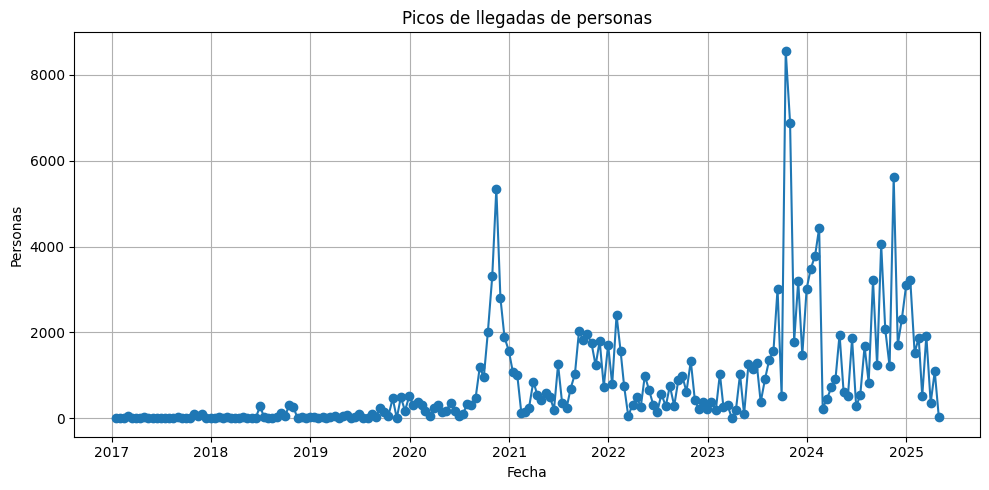

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(df['fecha_corte'], df['personas'], marker='o')
plt.title('Picos de llegadas de personas')
plt.xlabel('Fecha')
plt.ylabel('Personas')
plt.grid(True)
plt.tight_layout()
plt.show()


In [22]:
from sklearn.model_selection import train_test_split

# Crear copia del dataframe original
df_model = df.copy()

# Crear variables dummy para todas las estaciones
df_model = pd.get_dummies(df_model, columns=['estacion'], drop_first=False)

# Seleccionar features incluyendo todas las estaciones
features_extended = [
    'mes', 'quincena', 'dia_del_ano',
    'embarcaciones', 'acumulado_personas',
    'diff_interanual_personas',
    'estacion_Invierno', 'estacion_Primavera',
    'estacion_Verano', 'estacion_Otoño'
]

# Eliminar filas con valores nulos
model_df = df_model[features_extended + ['personas']].dropna()

# Separar X e y
X = model_df[features_extended]
y = model_df['personas']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Lista de modelos a evaluar
modelos = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": xgb.XGBRegressor(random_state=42, verbosity=0)
}

# Evaluar cada modelo
resultados = []

for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    resultados.append((nombre, mae, rmse, r2))

# Convertir a DataFrame para mostrar
resultados_df = pd.DataFrame(resultados, columns=['Modelo', 'MAE', 'RMSE', 'R2'])

# Ordenar por R2
resultados_df = resultados_df.sort_values(by='R2', ascending=False)

# Mostrar resultados
print(resultados_df)

resultados_df


              Modelo         MAE        RMSE        R2
2      Decision Tree  322.666667  624.134200  0.798256
1  Linear Regression  372.708852  720.525933  0.731129
3  Gradient Boosting  377.071145  862.856897  0.614413
0      Random Forest  400.937778  864.737761  0.612730
4            XGBoost  383.323456  949.807810  0.532785


,Modelo,MAE,RMSE,R2
2,Decision Tree,322.666667,624.134200,0.798256
1,Linear Regression,372.708852,720.525933,0.731129
3,Gradient Boosting,377.071145,862.856897,0.614413
0,Random Forest,400.937778,864.737761,0.612730
4,XGBoost,383.323456,949.807810,0.532785


,Modelo,MAE,RMSE,R2
2,Decision Tree,322.666667,624.134200,0.798256
1,Linear Regression,372.708852,720.525933,0.731129
3,Gradient Boosting,377.071145,862.856897,0.614413
0,Random Forest,400.937778,864.737761,0.612730
4,XGBoost,383.323456,949.807810,0.532785


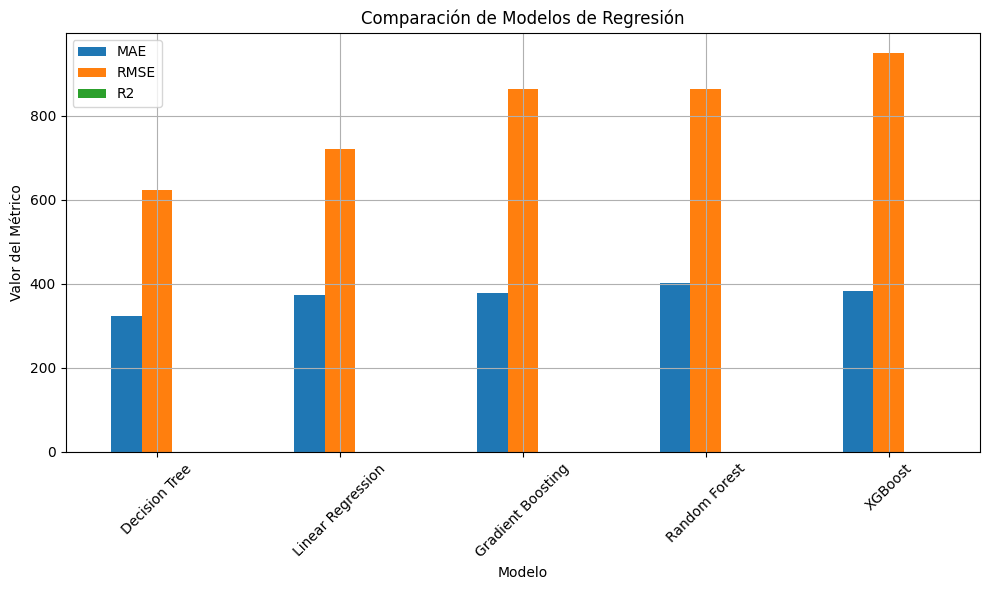

In [32]:
import matplotlib.pyplot as plt

# Ordenar por R² de mayor a menor
df_sorted = resultados_df.sort_values('R2', ascending=False)

# Crear gráfico de barras
df_sorted.set_index('Modelo')[['MAE', 'RMSE', 'R2']].plot(kind='bar', figsize=(10,6))
plt.title('Comparación de Modelos de Regresión')
plt.ylabel('Valor del Métrico')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


¿Por qué gana el árbol de decisión?

Posiblemente porque los datos tienen comportamientos segmentados o umbrales claros, y el árbol los capta fácilmente.

Al no haber aún muchas variables externas (como clima, isla, edad), un árbol simple puede estar "ajustado justo al patrón existente".

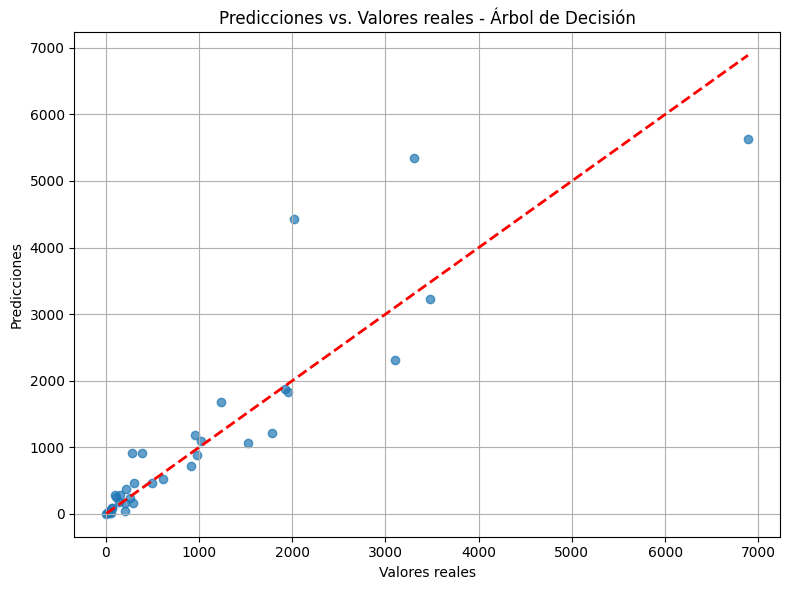

In [33]:
# Predecir con el modelo Decision Tree (ya entrenado)
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

# Crear gráfico de predicciones vs valores reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_tree, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores reales - Árbol de Decisión')
plt.grid(True)
plt.tight_layout()
plt.show()
